# CAR BRAND CLASSIFICATION MODEL

In [180]:
# first i'm going to import the libraries as shown below!

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [181]:
# now i'm going to re-size all the images to this size!

IMAGE_SIZE = [224, 224]

train_path = 'D:\Python Lab\Datasets\Train'  #the training data path
valid_path = 'D:\Python Lab\Datasets\Test'   #basically the validation or the test path!


In [182]:
# Now i'm going to Import the Resnet50 library as shown below and add preprocessing layer to the front of the resnet50! 
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [183]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [184]:
 [224,224] + [3]  #RGB Channel

[224, 224, 3]

In [185]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [186]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [188]:
folders 

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [189]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [190]:
prediction = Dense(len(folders), activation='softmax')(x)

# let us now create a model object 3 nodes
model = Model(inputs=resnet.input, outputs=prediction)


In [191]:
# view the structure of the model
model.summary()
#last layer main 3 nodes hai pls check!

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [192]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [193]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [194]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [195]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [196]:
# let's now fit the model
#  we will now Run the cell. definitely takes a time to run 50 epochs though!

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/50
2/2 [==============================] - 18s 11s/step - loss: 6.0029 - accuracy: 0.2812 - val_loss: 10.9911 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 14s 11s/step - loss: 7.1133 - accuracy: 0.3125 - val_loss: 4.6356 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 14s 10s/step - loss: 4.2910 - accuracy: 0.3906 - val_loss: 2.2866 - val_accuracy: 0.3448
Epoch 4/50
2/2 [==============================] - 16s 11s/step - loss: 3.3806 - accuracy: 0.4375 - val_loss: 3.3493 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 15s 11s/step - loss: 2.7692 - accuracy: 0.5000 - val_loss: 4.0975 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 18s 13s/step - loss: 2.9887 - accuracy: 0.4219 - val_loss: 3.4144 - val_accuracy: 0.3621
Epoch 7/50
2/2 [==============================] - 18s 13s/step - loss: 2.0757 - accuracy: 0.4531 - val_loss: 2.3217 - val_accuracy: 0.3276
Epoch 8/50
2/2 [==========

In [197]:
r.history

{'loss': [6.002851486206055,
  7.113283157348633,
  4.290979385375977,
  3.380594253540039,
  2.769237518310547,
  2.9886858463287354,
  2.075716495513916,
  1.1521904468536377,
  1.7849087715148926,
  1.6114511489868164,
  1.0483379364013672,
  1.281438946723938,
  0.721636176109314,
  1.1378228664398193,
  0.7810816764831543,
  0.7836761474609375,
  0.6042305827140808,
  0.8050653338432312,
  0.49388426542282104,
  0.6708678007125854,
  0.468825101852417,
  0.525454044342041,
  0.4000771641731262,
  0.5405123233795166,
  0.4070262014865875,
  0.43552663922309875,
  0.41077178716659546,
  0.35748934745788574,
  0.42904090881347656,
  0.3395969867706299,
  0.34466493129730225,
  0.35360175371170044,
  0.36156076192855835,
  0.30157482624053955,
  0.2905195951461792,
  0.2956094741821289,
  0.26422834396362305,
  0.29102611541748047,
  0.3556087613105774,
  0.2108152210712433,
  0.3430030345916748,
  0.3298739790916443,
  0.34398069977760315,
  0.22566331923007965,
  0.35394927859306335

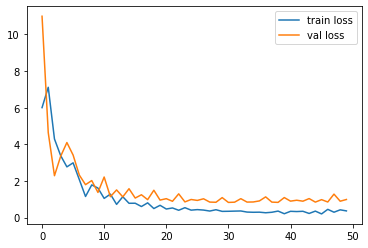

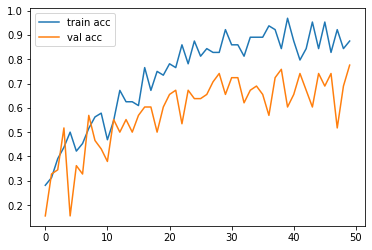

<Figure size 432x288 with 0 Axes>

In [198]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [199]:
# i will now save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [200]:
y_pred = model.predict(test_set)


In [201]:
y_pred

array([[1.40579056e-03, 9.31051791e-01, 6.75424561e-02],
       [8.52677785e-03, 5.51352978e-01, 4.40120339e-01],
       [1.98466219e-02, 6.65050030e-01, 3.15103352e-01],
       [1.01532496e-03, 9.76380110e-01, 2.26045474e-02],
       [1.33214975e-02, 1.60757512e-01, 8.25920939e-01],
       [2.32205614e-01, 7.47017682e-01, 2.07767766e-02],
       [1.52084709e-03, 9.53951299e-01, 4.45278399e-02],
       [4.45618093e-01, 3.84707004e-01, 1.69674888e-01],
       [5.21496113e-04, 5.91914803e-02, 9.40286994e-01],
       [1.56902662e-03, 7.32362151e-01, 2.66068786e-01],
       [7.08188295e-01, 1.69263884e-01, 1.22547776e-01],
       [2.42947321e-03, 2.26867810e-01, 7.70702720e-01],
       [1.02151737e-01, 5.38764834e-01, 3.59083414e-01],
       [4.34627477e-03, 6.90079451e-01, 3.05574298e-01],
       [2.62781302e-03, 8.37957382e-01, 1.59414798e-01],
       [1.37845930e-02, 4.78228629e-01, 5.07986844e-01],
       [2.36192159e-03, 7.43203521e-01, 2.54434586e-01],
       [5.23870159e-03, 2.11639

In [202]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [203]:
y_pred

array([1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [204]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [208]:

model=load_model('model_resnet50.h5')

In [217]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

image

<module 'tensorflow.keras.preprocessing.image' from 'C:\\Users\\omkar\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\keras\\api\\_v2\\keras\\preprocessing\\image\\__init__.py'>

In [218]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [219]:
x.shape

(224, 224, 3)

In [220]:
x = x/255

In [221]:
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [222]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [223]:
model.predict(img_data)

array([[1.9520147e-04, 2.4476970e-02, 9.7532779e-01]], dtype=float32)

In [224]:
a=np.argmax(model.predict(img_data), axis=1)

In [225]:
a

array([2], dtype=int64)

In [226]:
a==2

array([ True])

In [227]:
a==3

array([False])